## Homework 4: Spike-train statistics

Using non-homogeneous Poisson process, generate the spike train of 100 neurons (or 200 or 1000).

Do this for two different situations:

1) The firing rate $\lambda_t$ is independent for each neuron, and generated as random variables extracted each time step by an exponential distribution $p(\lambda_t)= r exp^{- r \lambda_t}$ with $r = 0.1$. 

2) The firing rate $\lambda_t$ is the same for each neuron, and generated as random variables extracted each time step by an exponential distribution $p(\lambda_t)= r exp ^{- r \lambda_t} $with $r=0.1$. 

For both cases you can use a time step dt = 0.01. Remember that the probability of a spike is $\lambda_t * dt$. Do at least 1000 timesteps.

 #### A) avalanches size distributions
 What is the differences in terms of neural avalanches for the two cases? You can, if you want, characterize the avalanches size distributions, remembering that an avalanche size is defined the total number of neurons spiking between to period of total silence (no neurons spiking).

#### B) Optional
Compute the avalanche durations analytically using the same parameters of the simulations for the two cases. The full calculations are available in the notes.

### Simulation of spike-train

In [1]:
import numpy as np
import matplotlib.pyplot as plt

I will represent spike trains in 2d array. Let each element of a matrix represent a time interval of 10 ms.  If there is a spike in this time interval, then we set the value of the element to 1, else we set it to zero. 

The simulation produces a spike train in 2 scenarios: 
- `Spike_train_1` $\rightarrow$ homogeneous firing rates for all neurons (but different for each timesteps);


- `Spike_train_2` $\rightarrow$ independent firing rates for each of the $N$ neurons (but different for each timesteps).

In [11]:
T_max = 10                  # number of time-steps
dt = 0.01                   # time - step size
T = np.arange(0, T_max, dt) # time
N = 1000                      # number of neurons
r = 0.1                     # spikes in each time interval
Spike_train_1 = np.zeros((N, len(T)))
Spike_train_2 = np.zeros((N, len(T)))
P = np.zeros(len(T)) # probability of having an avalanche of duration longer than t = n · dt

# firing rate is the same for each neuron in the same time step

for n in range(len(T)):
    firing_rates = np.random.exponential(scale=1/(r*dt), size=1)
    R = firing_rates * dt 
    P[n] = (1 - r/(r + N*dt))**(n / dt)
    
    x_rand = np.random.uniform(low=1e-10, high=1.0, size=N)
    Spike_train_1[:, n] = list(np.where(R < x_rand, 1, 0))

    
# firing rate is the different for each neuron in the same time step

for n in range(len(T)):
    firing_rates = np.random.exponential(scale=1/(r*dt), size=N)
    R = firing_rates * dt

    x_rand = np.random.uniform(low=1e-10, high=1.0, size = N)
    Spike_train_2[:, n] = list(np.where(R < x_rand, 1, 0))

### Plot the spike-trains 

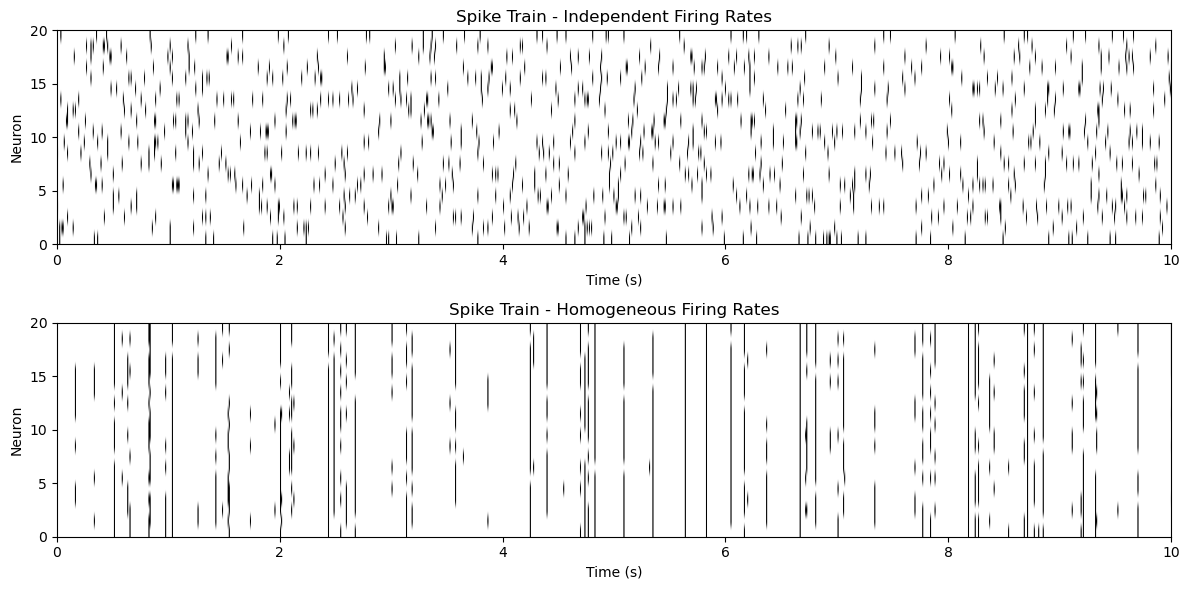

In [12]:
# Plot spike trains for a subset of neurons
subset_neurons = range(20)  # Choose a subset of neurons for visualization
num_timesteps  = 1000
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.imshow(Spike_train_2[subset_neurons, :], aspect='auto', cmap='binary', extent=[0, num_timesteps*dt, 0, len(subset_neurons)])
plt.title('Spike Train - Independent Firing Rates')
plt.xlabel('Time (s)')
plt.ylabel('Neuron')

plt.subplot(2, 1, 2)
plt.imshow(Spike_train_1[subset_neurons, :], aspect='auto', cmap='binary', extent=[0, num_timesteps*dt, 0, len(subset_neurons)])
plt.title('Spike Train - Homogeneous Firing Rates')
plt.xlabel('Time (s)')
plt.ylabel('Neuron')

plt.tight_layout()
plt.show()

An alternative approach to plot the spike trains is to use the matplotlib.pyplot.eventplot as showed in the following box. 

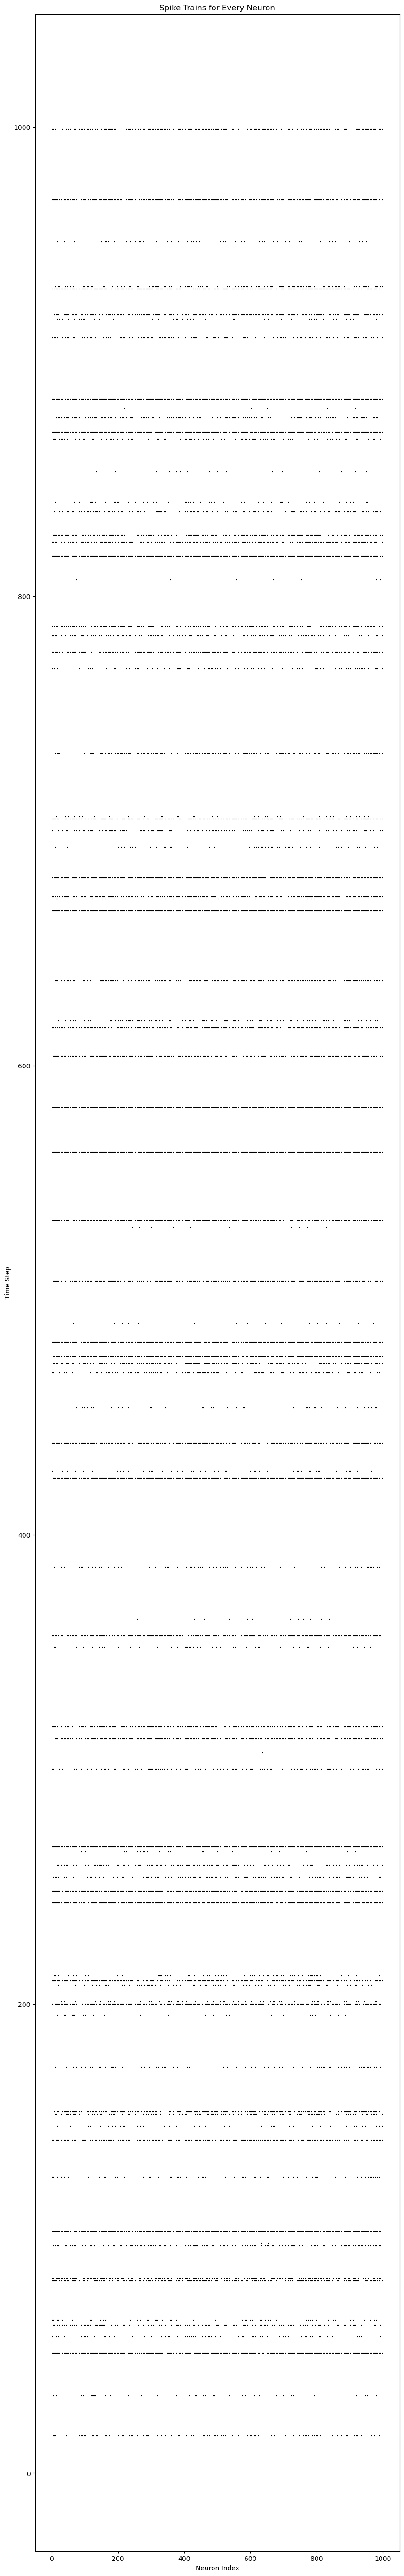

In [13]:
# Plotting the spike trains for every neuron
fig, ax = plt.subplots(figsize=(10, 70))

for neuron_idx in range(Spike_train_1.shape[0]):
    spike_times = np.where(Spike_train_1[neuron_idx] == 1)[0]
    ax.eventplot(spike_times, lineoffsets=neuron_idx + 1, linelengths=0.8, color='black', orientation='vertical')

ax.set_ylabel('Time Step')
ax.set_xlabel('Neuron Index')
ax.set_title('Spike Trains for Every Neuron')
plt.show()

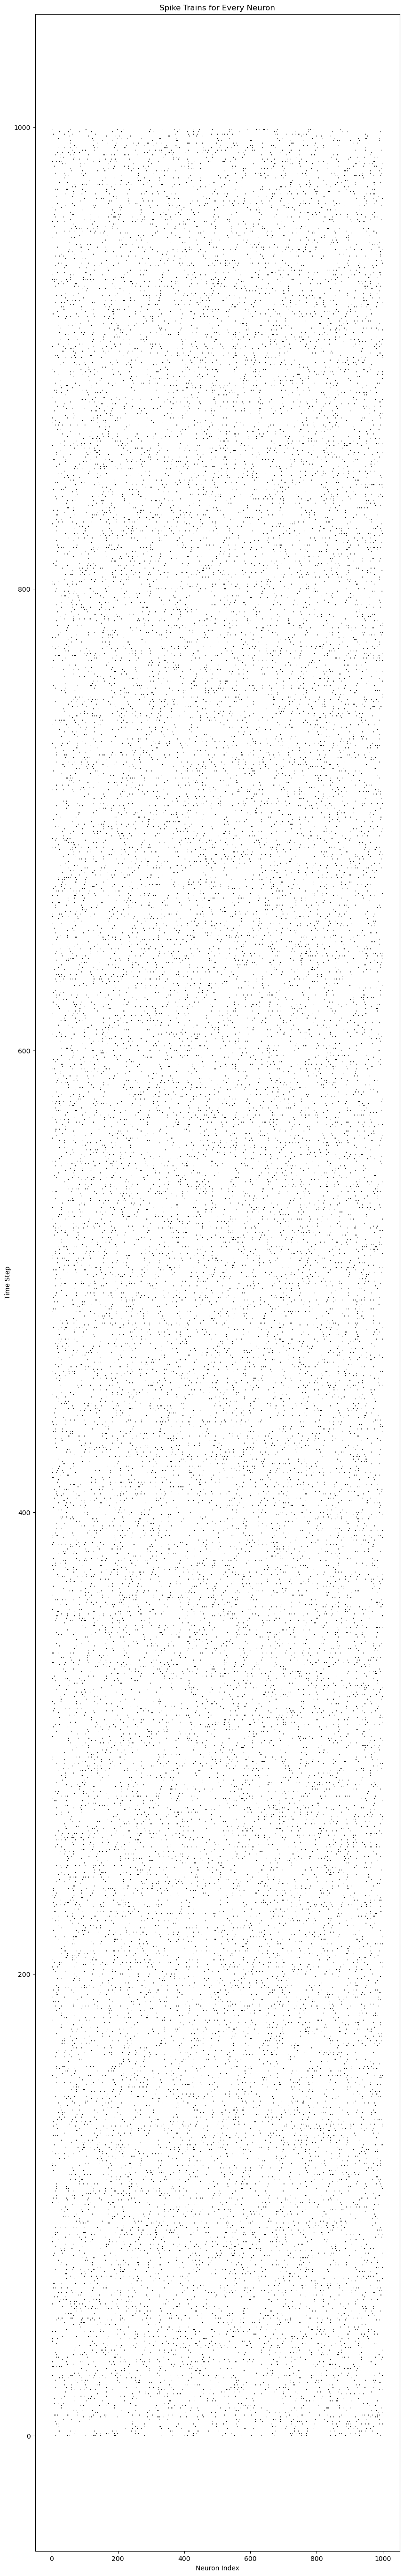

In [14]:
# Plotting the spike trains for every neuron
fig, ax = plt.subplots(figsize=(10, 70))

for neuron_idx in range(Spike_train_2.shape[0]):
    spike_times = np.where(Spike_train_2[neuron_idx] == 1)[0]
    ax.eventplot(spike_times, lineoffsets=neuron_idx + 1, linelengths=0.8, color='black', orientation='vertical')

ax.set_ylabel('Time Step')
ax.set_xlabel('Neuron Index')
ax.set_title('Spike Trains for Every Neuron')
plt.show()


#### Avalanche time distribution and avalanche size distribution

The avalanche size is defined the total number of neurons spiking between to period of total silence (no neurons spiking).

The avalanche time is the total time steps of neurons spiking between to period of total silence.


In the first case where the firing rate $\lambda_t$ is independent for each neuron, we expect the neural avalanches to exhibit more variability in size (as different neurons may become active at different times). Since each neuron has its own independent firing rate, the overall network activity is influenced by the combined effect of multiple stochastic processes.

In the second case where the firing rate $\lambda_t$ is the same for each neuron, we expect the neural avalanches to be more synchronized. All neurons contribute to the network activity with the same underlying firing rate, leading to a more coordinated and uniform pattern of spiking. As a result, the avalanches in this case may have more consistent sizes, with less variability compared to the first case.

However the result I obtained is not completely satisfactory, and goes in the direction of some issues in the simulation part of the code.

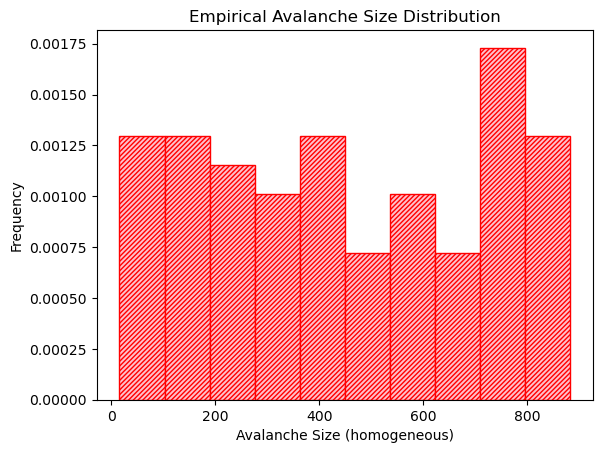

In [15]:
# Total number of spiking neurons at each timestep

def calculate_avalanche_sizes(spike_train):
    spiking_count = []
    
    for n in range(spike_train.shape[1] - 1):
        spiking_count.append(np.sum(spike_train[:, n]))
    
    sums = []
    current_sum = 0
    
    for count in spiking_count:
        if count != 0:
            current_sum += count
        else:
            sums.append(current_sum)
            current_sum = 0
    
    if current_sum != 0:
        sums.append(current_sum)
    
    sums = np.nonzero(sums)[0]
    
    return sums

_,_,_ = plt.hist(calculate_avalanche_sizes(Spike_train_1), bins=10, density = True, edgecolor='red', color = 'pink', hatch = '///////')
plt.xlabel('Avalanche Size (homogeneous)')
plt.ylabel('Frequency')
plt.title('Empirical Avalanche Size Distribution')
plt.show()


The avalanche time distribution, as depicted in the log-log plot in our case, should ideally exhibit an exponential trend (thus forming a straight line in the log-log scale), which is approximately what is observed.

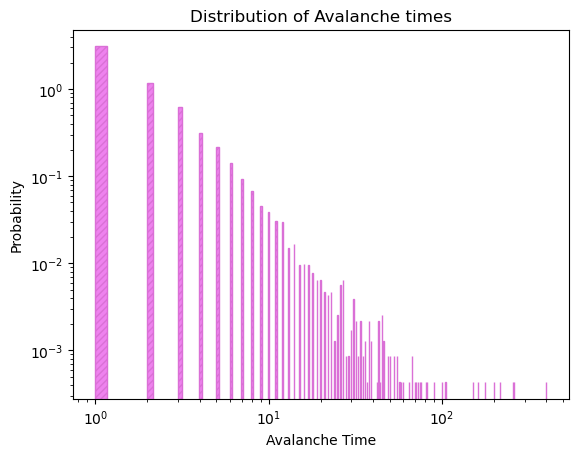

In [16]:
def compute_avalanche_time_distribution(spike_train):
    """
    Compute the avalanche size distribution from a spike train.

    Parameters:
    - spike_train: Binary matrix representing the spike train

    Returns:
    - avalanche_sizes: List of avalanche sizes
    """
    num_neurons = spike_train.shape[1]
    avalanche_sizes = []

    for neuron_id in range(num_neurons):
        neuron_spikes = spike_train[:, neuron_id]
        spike_indices = np.where(neuron_spikes == 1)[0]

        if len(spike_indices) > 0:
            diff_indices = np.diff(spike_indices)
            silence_indices = np.where(diff_indices > 1)[0]
            avalanche_sizes.extend(np.diff(np.insert(silence_indices, 0, -1)))

    return avalanche_sizes

avalanche_sizes = compute_avalanche_time_distribution(Spike_train_1)
plt.hist(avalanche_sizes, bins='auto', density=True, edgecolor='orchid', color = 'violet', hatch = '/////')
plt.xlabel('Avalanche Time')
plt.ylabel('Probability')
plt.title('Distribution of Avalanche times')
plt.xscale('log')
plt.yscale('log')
plt.show()


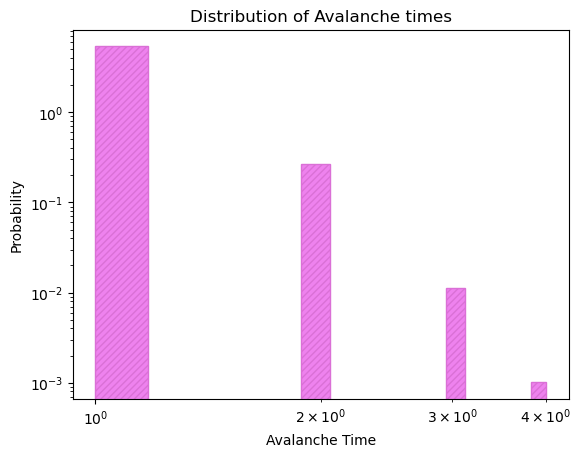

In [17]:
avalanche_sizes = compute_avalanche_time_distribution(Spike_train_2)
plt.hist(avalanche_sizes, bins='auto', density=True, edgecolor='orchid', color = 'violet', hatch = '/////')
plt.xlabel('Avalanche Time')
plt.ylabel('Probability')
plt.title('Distribution of Avalanche times')
plt.xscale('log')
plt.yscale('log')
plt.show()


#### Distribution of inter-spike times

The distribution of inter-spike interval times is expected to behave like a Poisson distribution. However, in this case, there are some anomalies or issues evident in the part of the plot near zero.

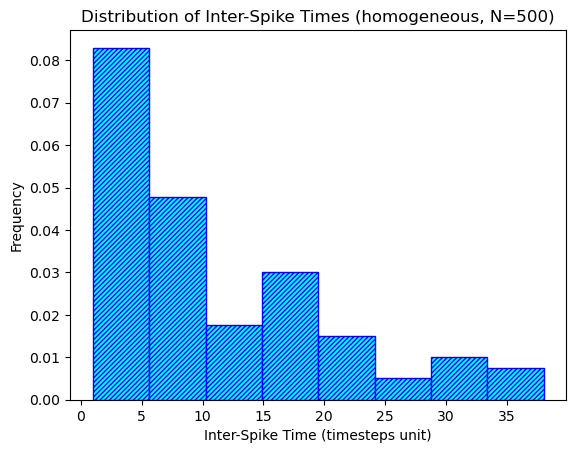

In [18]:
def calculate_inter_spike_times(Spike_train):
    spiking_count = [np.sum(Spike_train[:, n]) for n in range(Spike_train.shape[1] - 1)]
    spiking_count = np.array(spiking_count)

    indices = np.where(spiking_count > 0)[0]
    inter_spike_times = np.diff(indices)

    return inter_spike_times

inter_spike_times_1 = calculate_inter_spike_times(Spike_train_1)

# Plot histogram
plt.hist(inter_spike_times_1, density = True, bins='auto', edgecolor='blue', color = 'cyan', hatch = '///////')
plt.xlabel('Inter-Spike Time (timesteps unit)')
plt.ylabel('Frequency')
plt.title('Distribution of Inter-Spike Times (homogeneous, N=500)')
plt.show()
